<a href="https://colab.research.google.com/github/ubinix-warun/mad-bootcamp-2024/blob/main/colab/MAD_week2_1_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***This notebook is a part of chapter 4.4***

#1. Prepare classification dataset

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Step 1: Create an example dataset for classification problems
X, y = make_classification(n_samples=200, n_features=10, n_informative=2, n_redundant=5, random_state=42)

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df = pd.DataFrame(X,columns=[f'col_{i}' for i in range(10)])
df.loc[:,'label'] = y

In [ ]:
df.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,label
0,0.207988,-0.612789,-0.355057,1.698855,0.568968,-0.387702,-1.563108,0.285865,-0.496240,-1.043830,0
1,0.960013,0.709004,1.165969,1.375553,0.519723,-0.089736,-0.241879,1.440117,-0.343189,-0.346434,1
2,0.950165,-0.176947,1.495896,0.573296,0.257627,-0.798297,0.610562,-1.379319,-0.102304,0.202175,1
3,-0.013824,-1.515744,-0.332294,0.707517,0.229466,1.547505,-0.780885,1.795878,-0.214105,-0.498005,0
4,-0.548026,-0.777817,0.020544,-2.366983,-0.811991,-1.110576,1.843876,1.752270,0.672281,1.291645,1


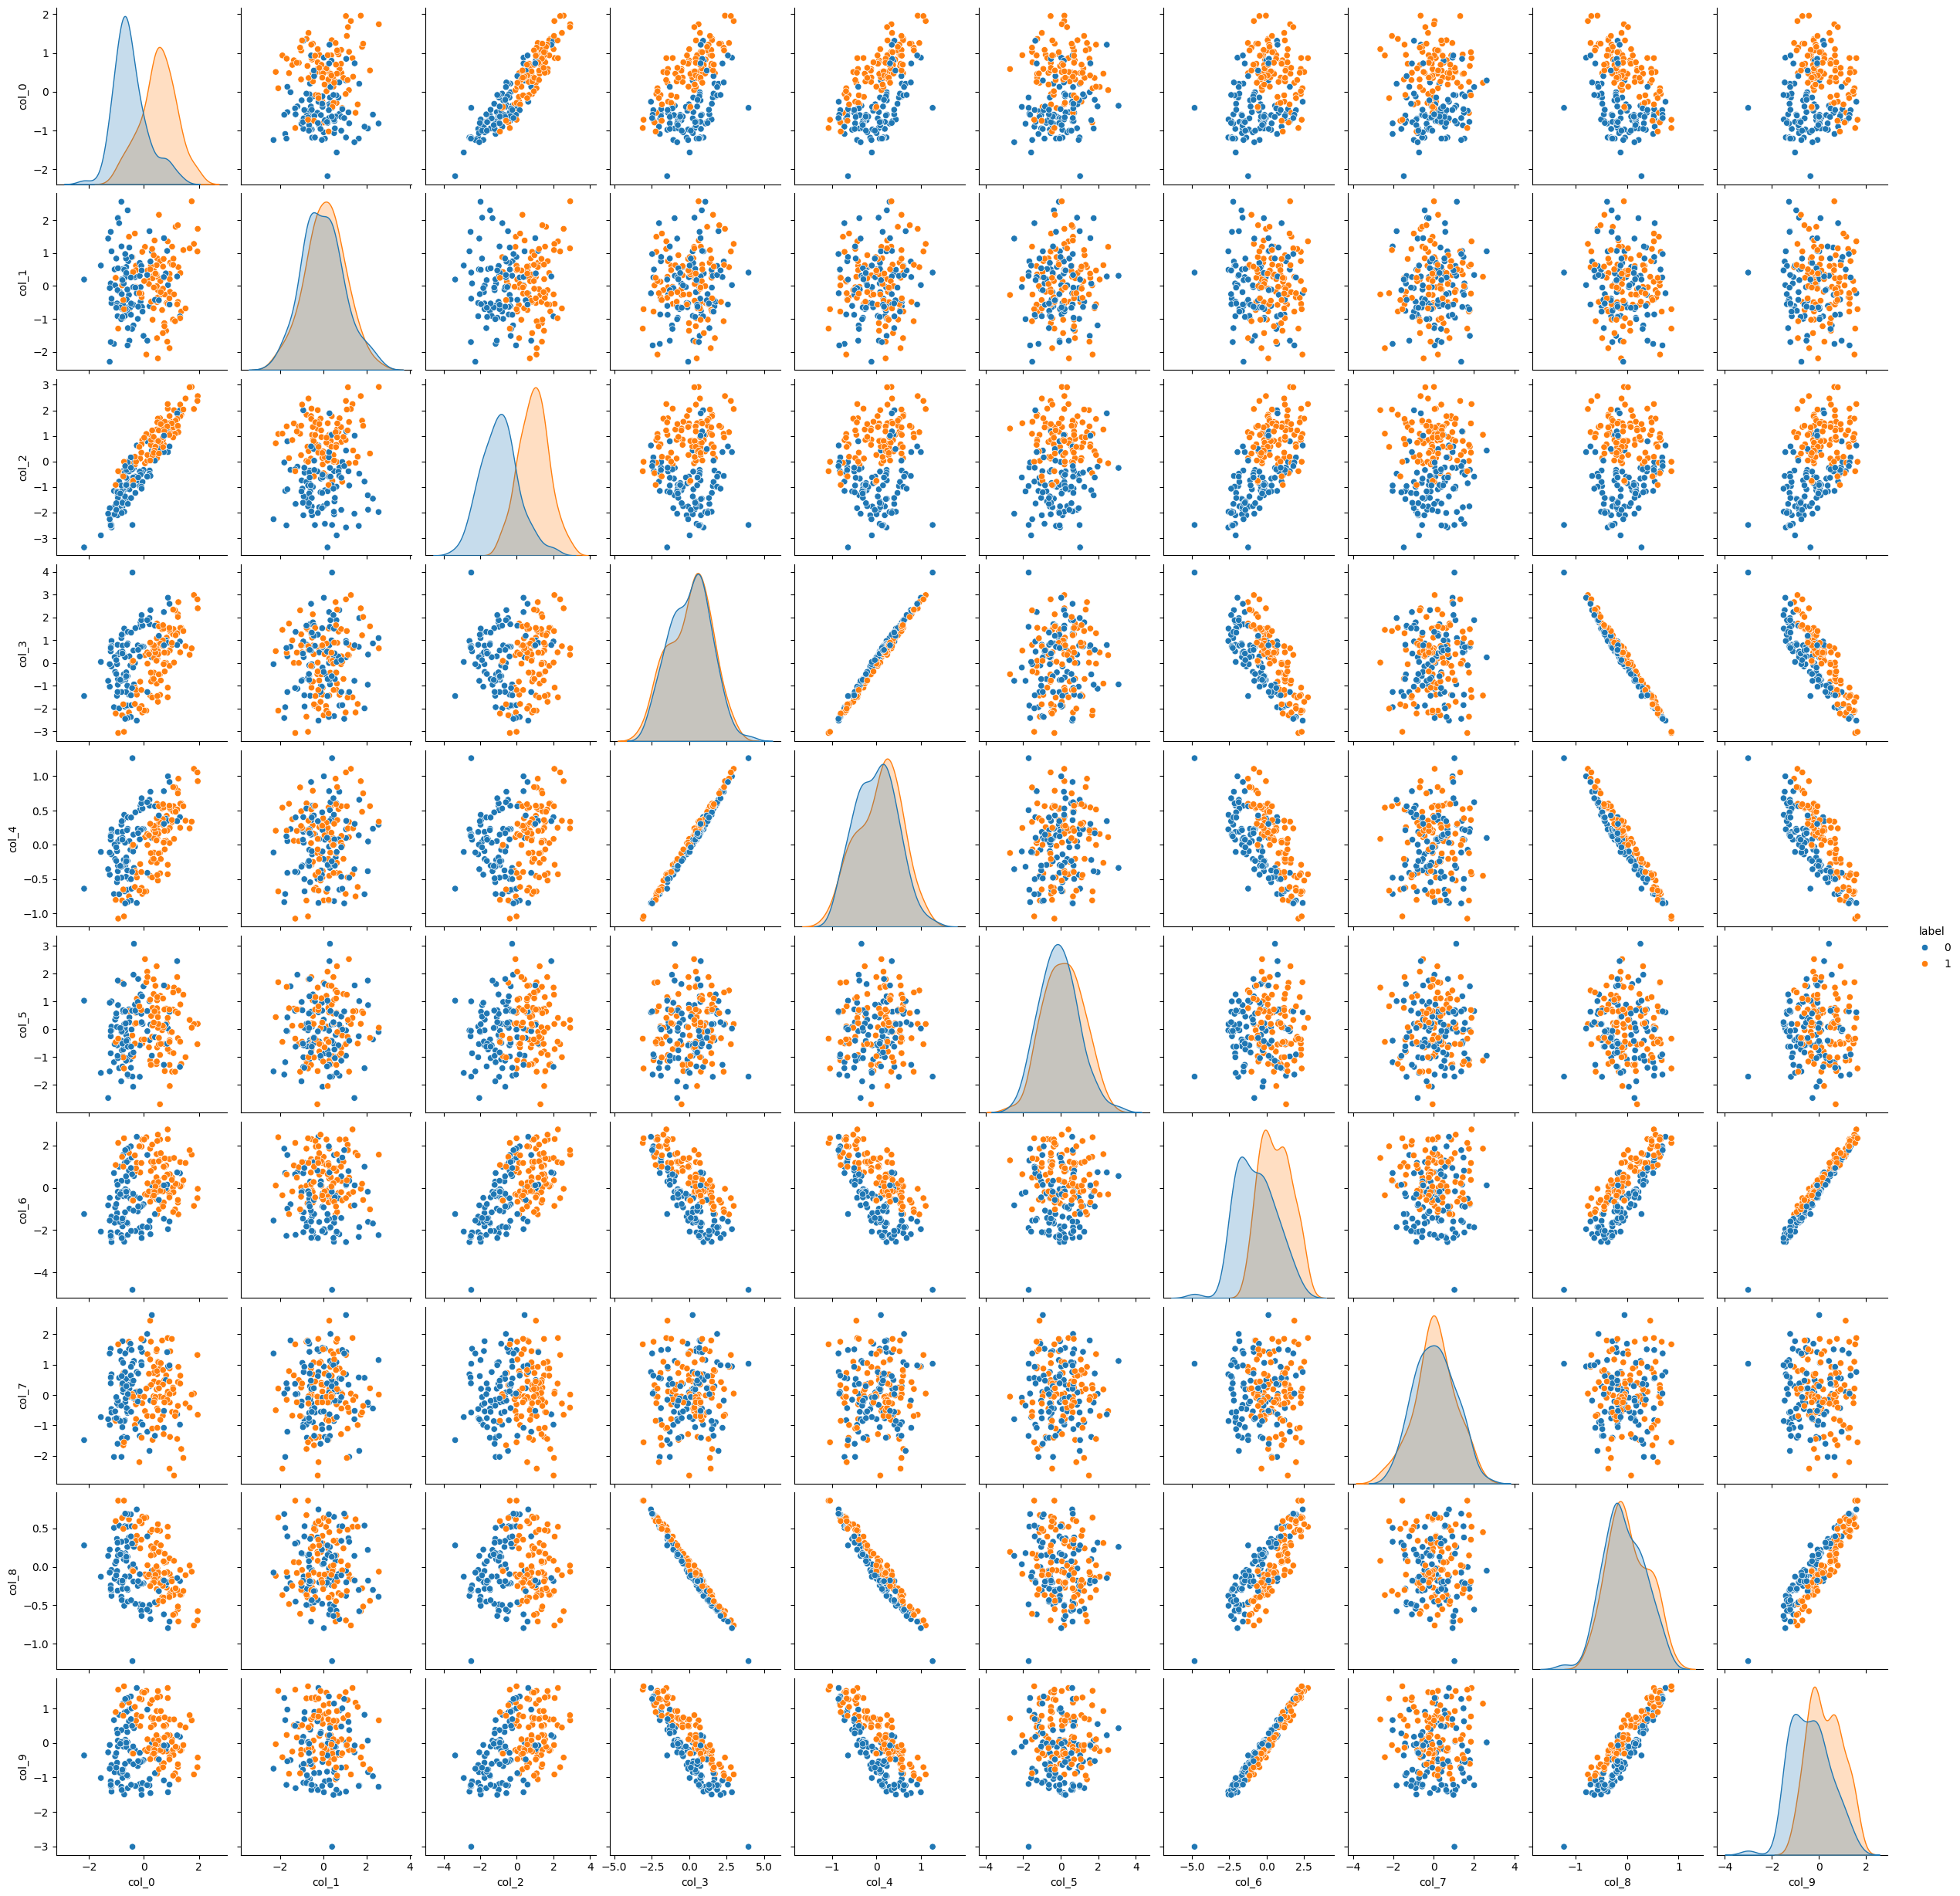

In [ ]:
# this visualization take time aroung 2-3 minutes.
sns.pairplot(df,hue='label')

#2. Logistic regression

In [ ]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X, y)
y_pred_logistic = logistic_model.predict(X)

# Evaluate Logistic Regression
accuracy_logistic = accuracy_score(y, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic)
print("Classification Report for Logistic Regression:\n", classification_report(y, y_pred_logistic))
print("Confusion Matrix for Logistic Regression:\n", confusion_matrix(y, y_pred_logistic))


Logistic Regression Accuracy: 0.87
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       100
           1       0.86      0.89      0.87       100

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200

Confusion Matrix for Logistic Regression:
 [[85 15]
 [11 89]]


#3. Decision tree

In [ ]:
tree_model = DecisionTreeClassifier(random_state=42,max_depth=3)
tree_model.fit(X, y)
y_pred_tree = tree_model.predict(X)

# Evaluate Decision Tree
accuracy_tree = accuracy_score(y, y_pred_tree)
print("\nDecision Tree Accuracy:", accuracy_tree)
print("Classification Report for Decision Tree:\n", classification_report(y, y_pred_tree))
print("Confusion Matrix for Decision Tree:\n", confusion_matrix(y, y_pred_tree))



Decision Tree Accuracy: 0.93
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       100
           1       0.91      0.96      0.93       100

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200

Confusion Matrix for Decision Tree:
 [[90 10]
 [ 4 96]]


#4. Neural network

In [ ]:
nn_model = MLPClassifier(hidden_layer_sizes=(20,), max_iter=500, random_state=42)
nn_model.fit(X, y)
y_pred_nn = nn_model.predict(X)

# Evaluate Neural Network
accuracy_nn = accuracy_score(y, y_pred_nn)
print("\nNeural Network Accuracy:", accuracy_nn)
print("Classification Report for Neural Network:\n", classification_report(y, y_pred_nn))
print("Confusion Matrix for Neural Network:\n", confusion_matrix(y, y_pred_nn))


Neural Network Accuracy: 0.895
Classification Report for Neural Network:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89       100
           1       0.89      0.90      0.90       100

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.89       200

Confusion Matrix for Neural Network:
 [[89 11]
 [10 90]]


# 5. Compare model performances

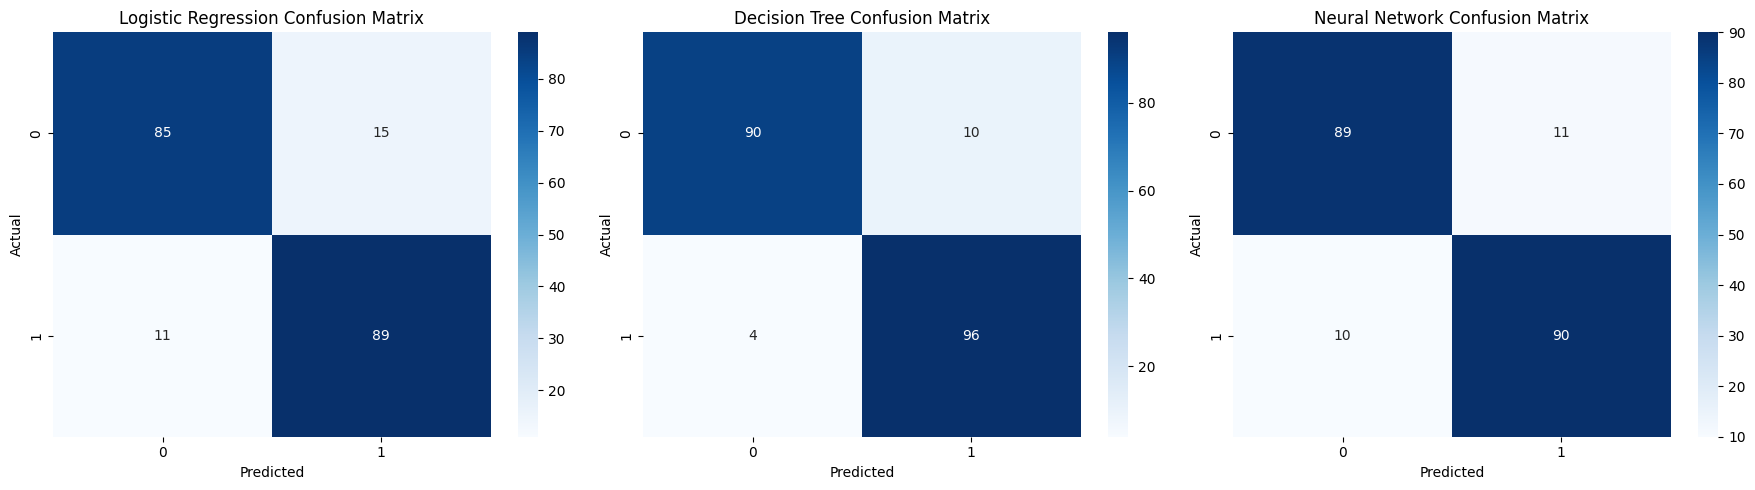

In [ ]:
# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Confusion matrix for Logistic Regression
sns.heatmap(confusion_matrix(y, y_pred_logistic), annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Confusion matrix for Decision Tree
sns.heatmap(confusion_matrix(y, y_pred_tree), annot=True, fmt='d', ax=axes[1], cmap='Blues')
axes[1].set_title('Decision Tree Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# Confusion matrix for Neural Network
sns.heatmap(confusion_matrix(y, y_pred_nn), annot=True, fmt='d', ax=axes[2], cmap='Blues')
axes[2].set_title('Neural Network Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()